In [2]:
import gym
import gym_nav
import proplot as pplt
import matplotlib.pyplot as plt
from read_experiments import *

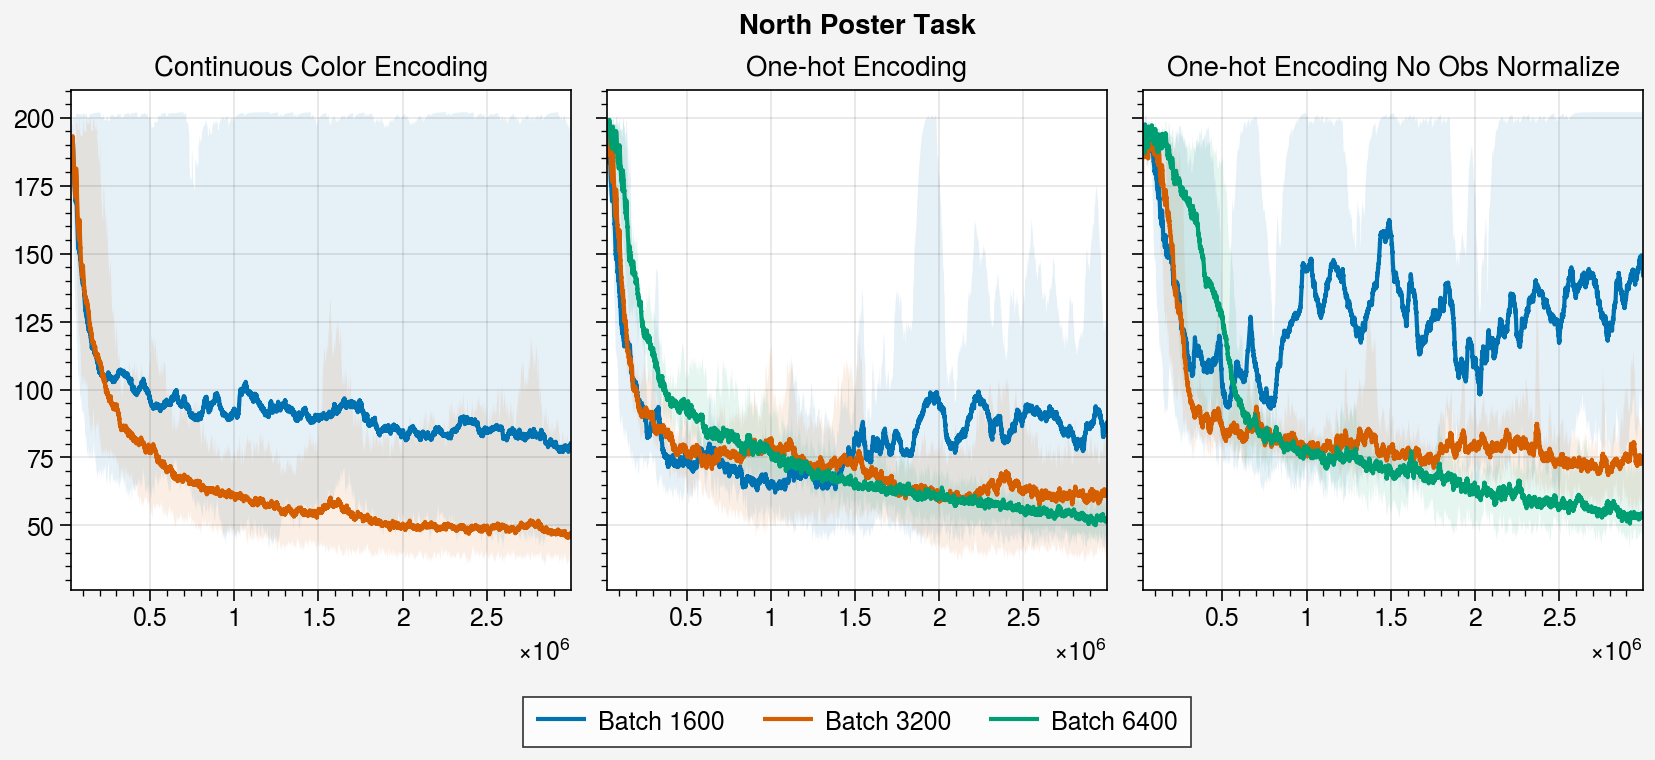

In [16]:
fig, ax = pplt.subplots(ncols=3)

batch_sizes = [16, 32, 64]
exps = ['nav_pnorth/nav_pdistal_batch{}auxnone', 'nav_pnorth/nav_pnorth_batch{}onehot',
        'nav_pnorth/nav_pnorth_batch{}onehotnovec']

for i, exp in enumerate(exps):
    lines = []
    for batch in batch_sizes:
        if i == 0 and batch == 64:
            continue
        lines.append(average_runs(exp.format(batch), 'length', ignore_first=100, ax=ax[i], label=f'Batch {batch*100}'))
        
ax.format(title=['Continuous Color Encoding', 'One-hot Encoding', 'One-hot Encoding No Obs Normalize'], suptitle='North Poster Task')
fig.legend(lines, loc='b')

# Explore tasks

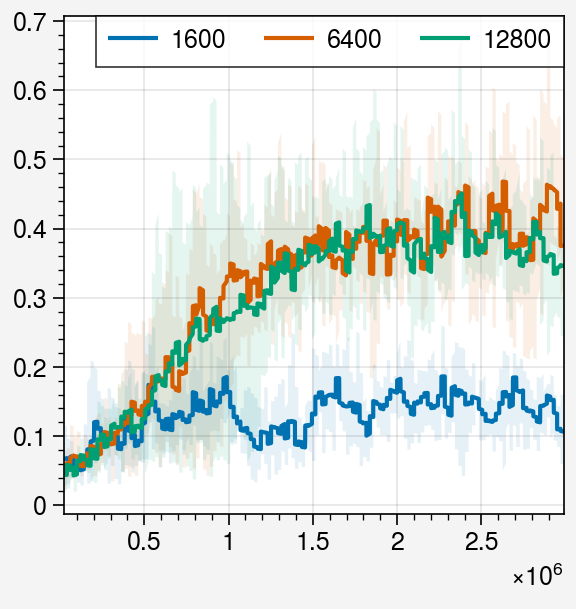

In [15]:
batch_sizes = [16, 64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}onehot', ax=ax, label=f'{batch*100}')
    
ax.legend()

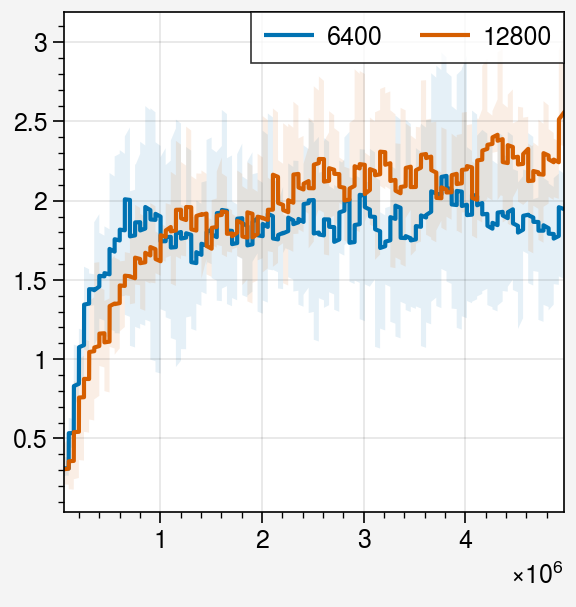

In [17]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster', ax=ax, label=f'{batch*100}')
    
ax.legend()

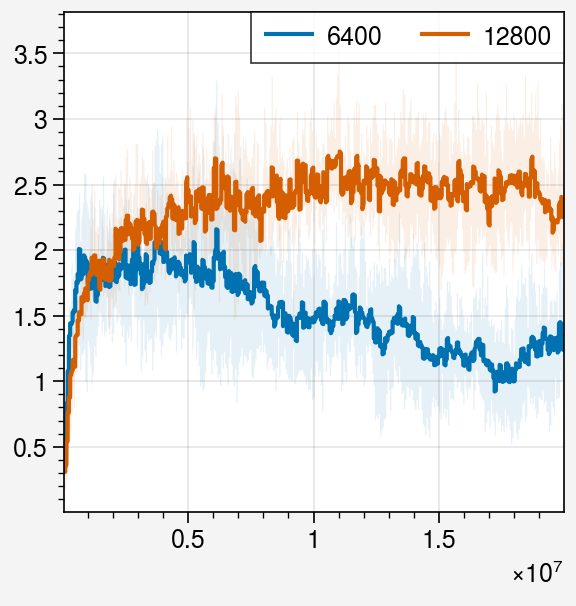

In [2]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster20m', ax=ax, label=f'{batch*100}')
    
ax.legend()

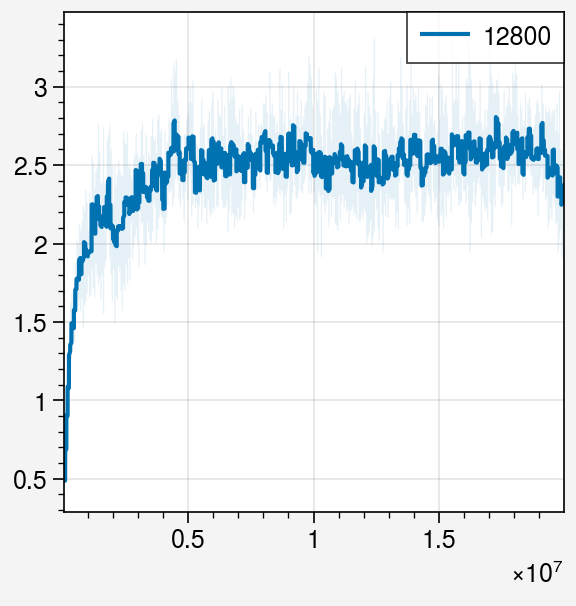

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128faster20mrewexplore', ax=ax, label=f'{batch*100}')
    
ax.legend()

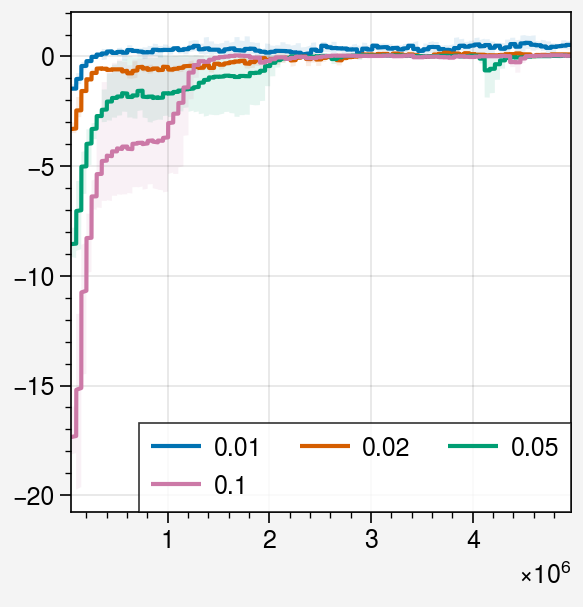

In [2]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'nav_4we_aux/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    

ax.legend()

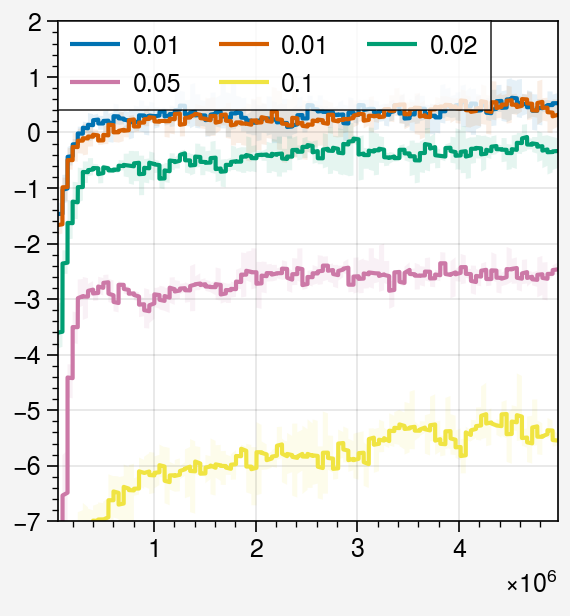

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fixed punishment

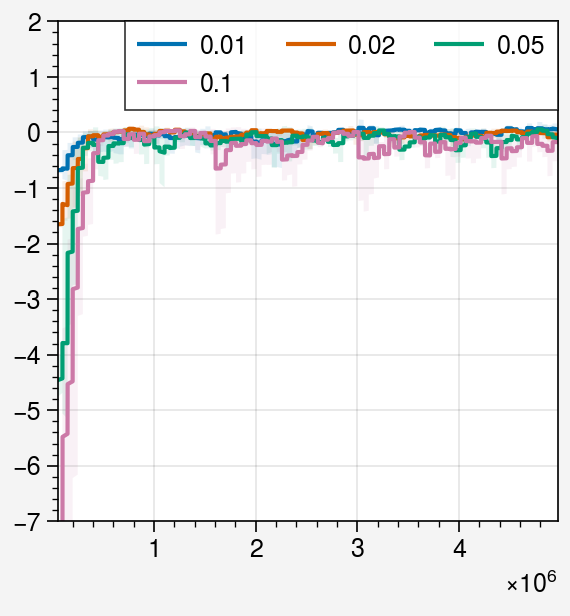

In [8]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fully connected before RNN and fixed punishment

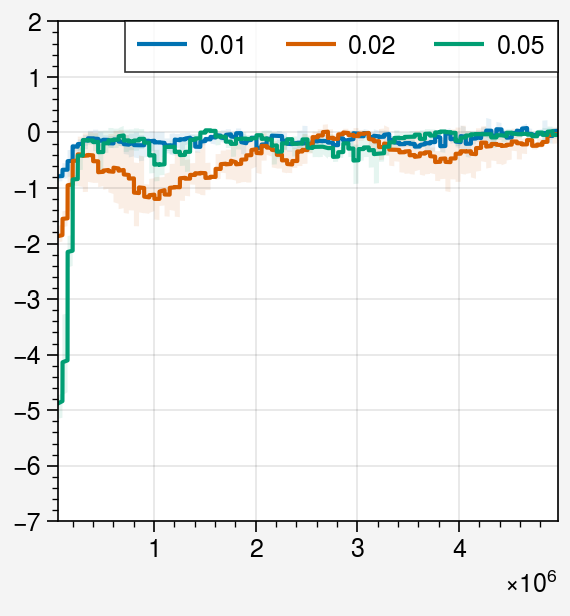

In [7]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05]
for pun in punishment_sizes:
    exp_name = f'4wefc_punish/nav_4wefc_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### FC -> RNN and exponential punish + bonus

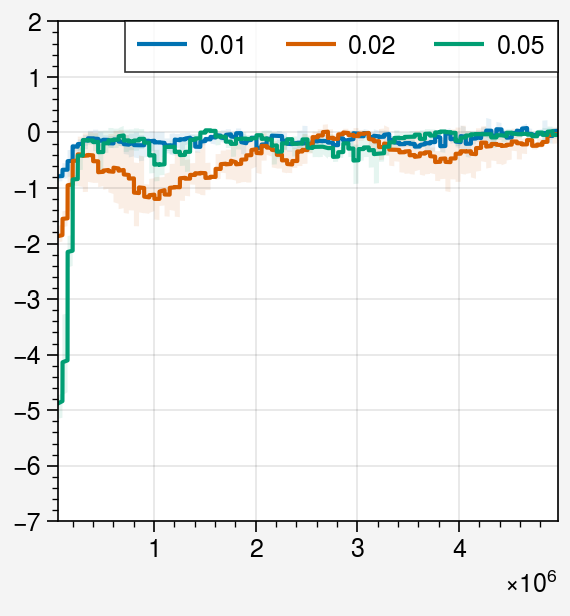

In [7]:
fig, ax = pplt.subplots()

sub_reward_sizes = [0.01, 0.02, 0.04]
punish_args = [3, 5, 7]
mults = [2, 5]


for punish_arg in punish_args:
    for mult in mults:        
        for sub_reward in sub_reward_sizes:
            exp_name = f'nav_4wefc_ep{sub_reward}mult{mult}arg{punish_arg}_t{i}'
            average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

# Explore env

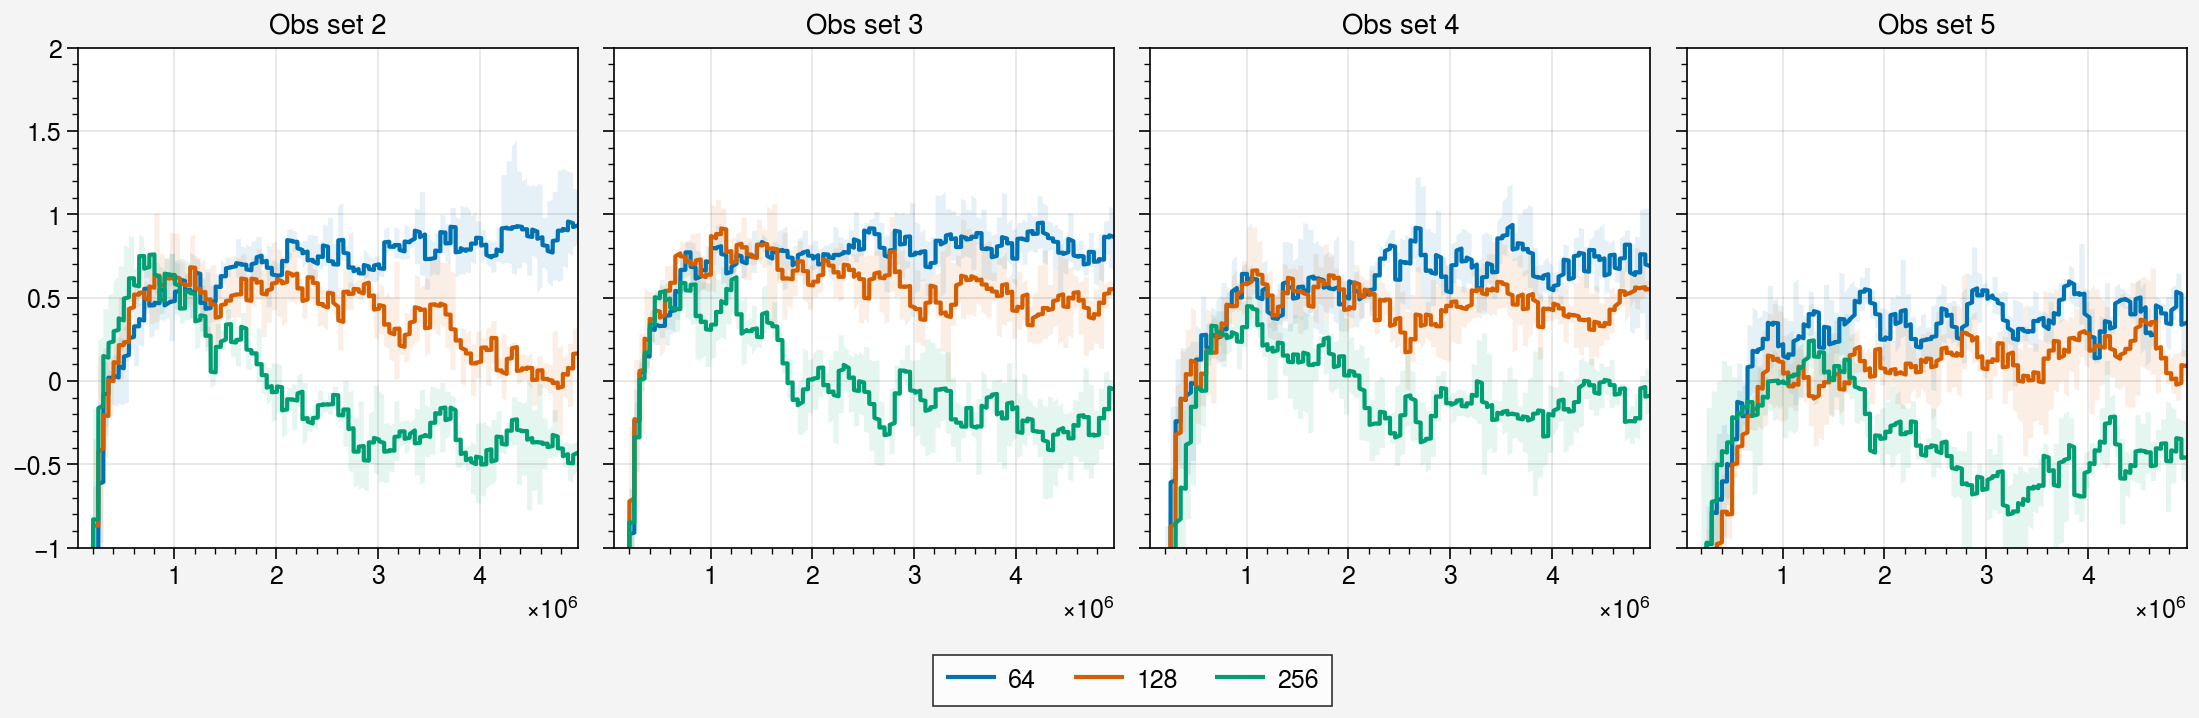

In [4]:
obs_sets = [2, 3, 4, 5]
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots(ncols=4)

for i, obs in enumerate(obs_sets):
    lines = []
    for hidden in network_sizes:
        exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}'
        lines.append(average_runs(exp_name, ax=ax[i], label=str(hidden)))

ax.format(title=[f'Obs set {obs}' for obs in obs_sets], ylim=[-1, 2])
fig.legend(lines, loc='b')

## Larger batch, longer training

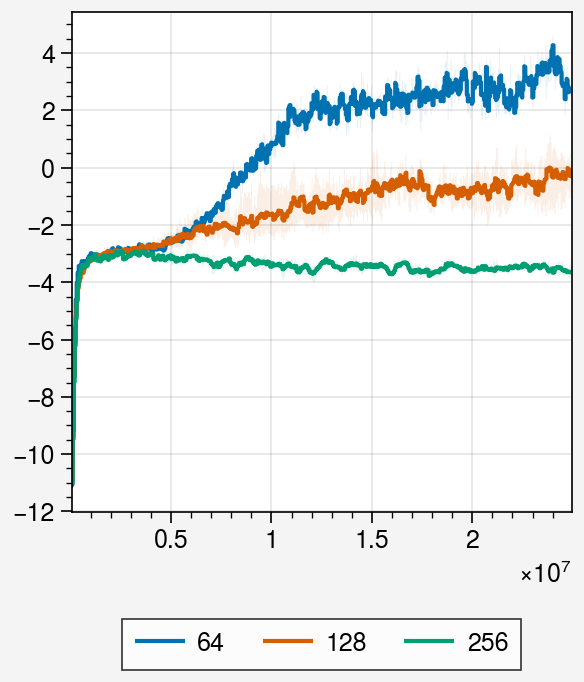

In [3]:
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b')

### Shorter batch, longer training

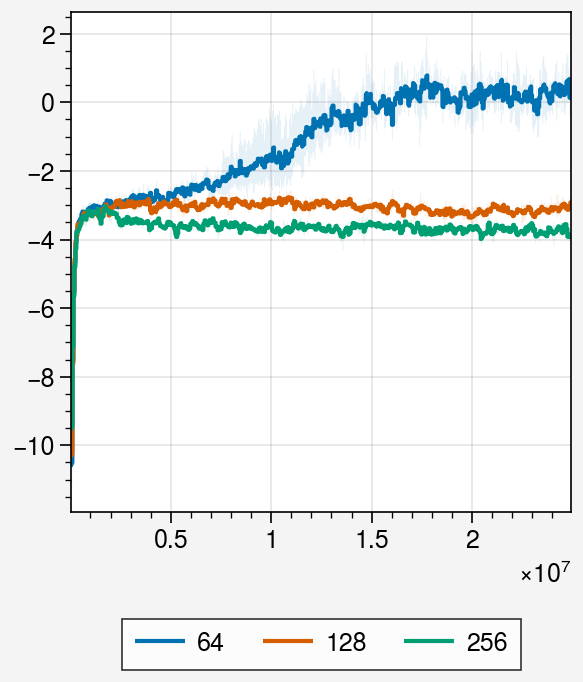

In [4]:
network_sizes = [64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_batch128obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b')

### Smaller network sizes

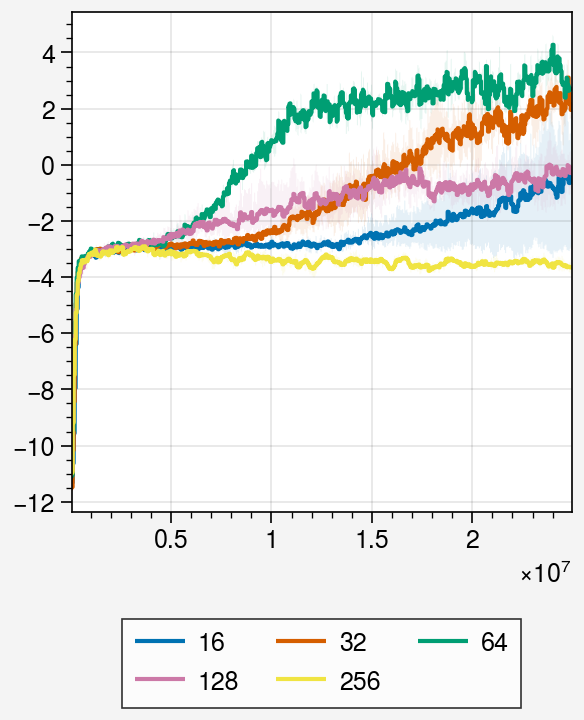

In [6]:
network_sizes = [16, 32, 64, 128, 256]

fig, ax = pplt.subplots()

lines = []
for hidden in network_sizes:
    exp_name = f'explorenav_pos/expl_goalpos_obs3hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(hidden)))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b')

### Network 64, batch 256, longer training, obs sets 1/2/3

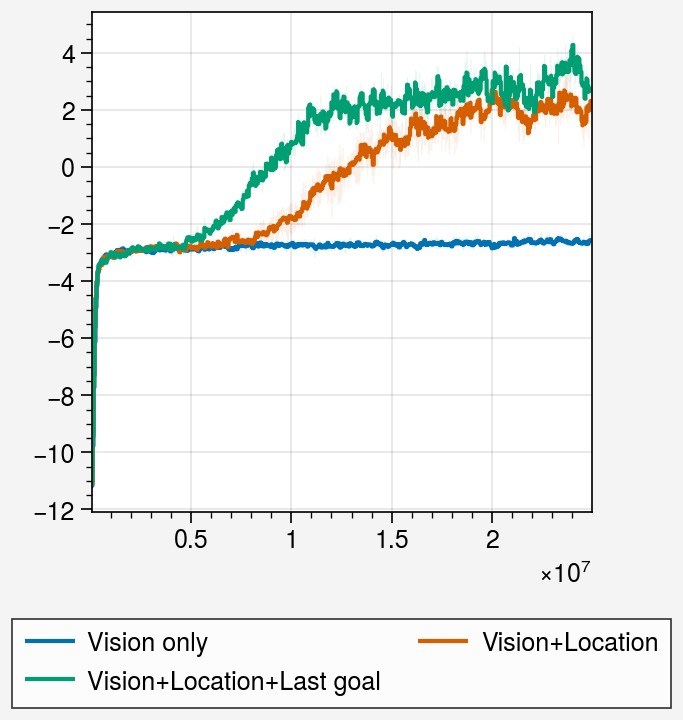

In [10]:
obs_sets = [1, 2, 3]
obs_labels = ['Vision only',  'Vision+Location', 'Vision+Location+Last goal']
hidden = 64

fig, ax = pplt.subplots()

lines = []
for i, obs in enumerate(obs_sets):
    exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}longer'
    lines.append(average_runs(exp_name, ax=ax, label=str(obs_labels[i])))

# ax.format(ylim=[-1, 2])
fig.legend(lines, loc='b', ncols=2)

In [ ]:
import pickle
res = pickle.load(open('./video/obs2hidden64t0/res', 'rb'))

In [ ]:
res.keys()

# Shortcut environment

* Once agents successfully reach the platform, they almost immediately have a fixed policy to get to the goal with 100% success rate
    * Might need to increase the randomness of starting position to prevent how much memorization occurs

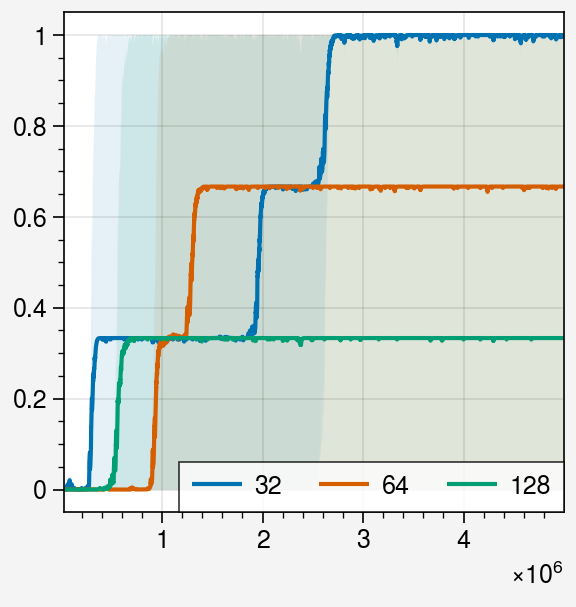

In [3]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, ax=ax, label=str(batch))

ax.legend()

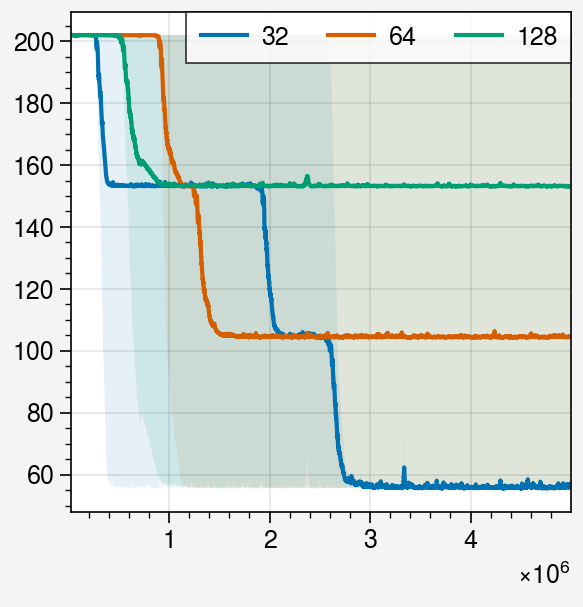

In [4]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, 'length', ax=ax, label=str(batch))

ax.legend()

In [5]:
batch = 32
exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True)

<a list of 1 Line2D objects>

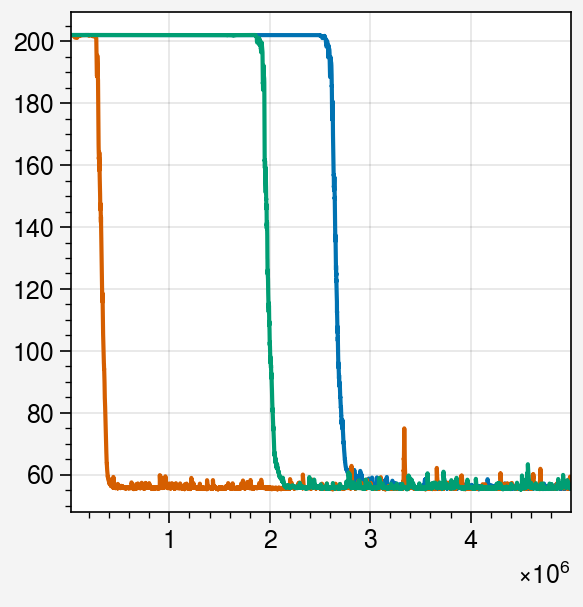

In [11]:
fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])

## Shortcut probabilities

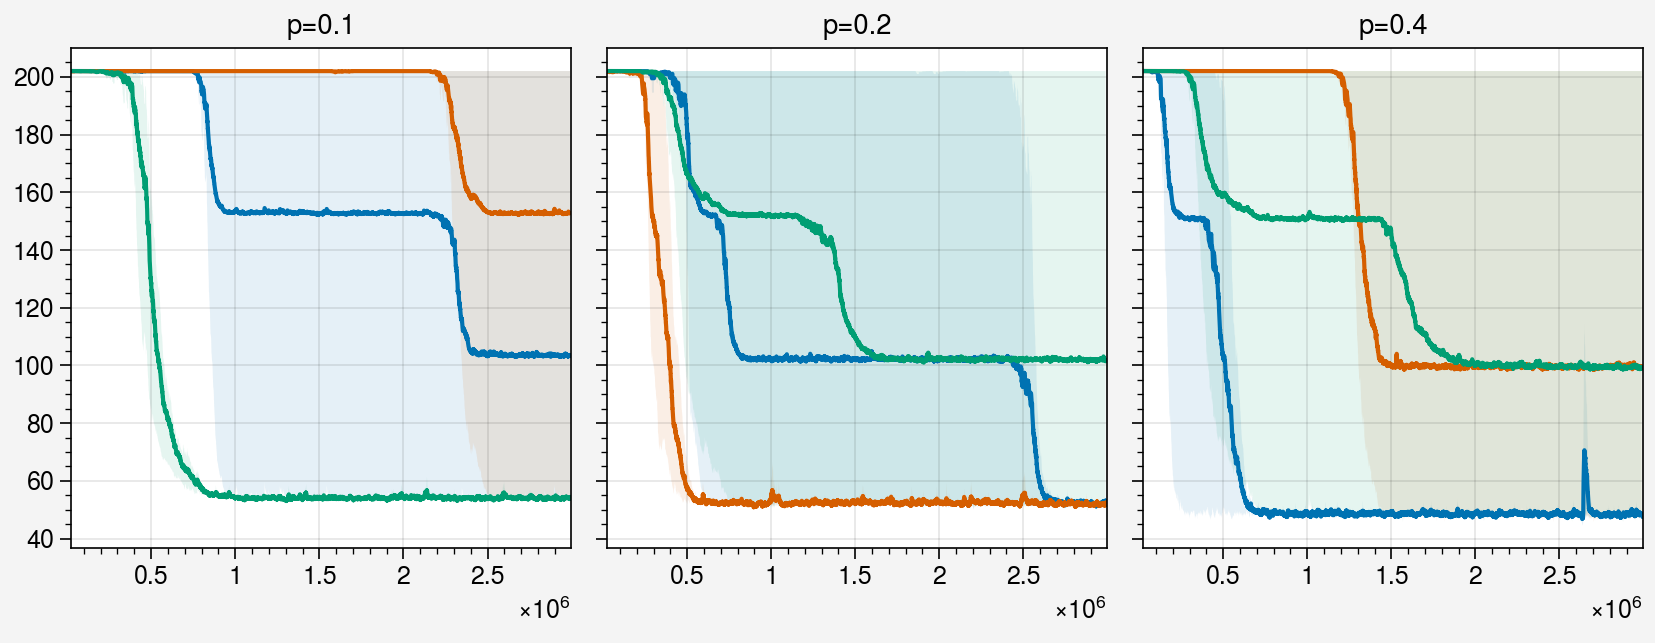

In [2]:
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64, 128]
fig, ax = pplt.subplots(ncols=3)
for i, prob in enumerate(probs):
    lines = []
    for batch in batch_sizes:
        exp_name = f'shortcuts/shortcutnav_shortcutprob{prob}batch{batch}'
        lines.append(average_runs(exp_name, 'length', ax=ax[i], label=f'{batch}'))

ax.format(title=[f'p={prob}' for prob in probs])

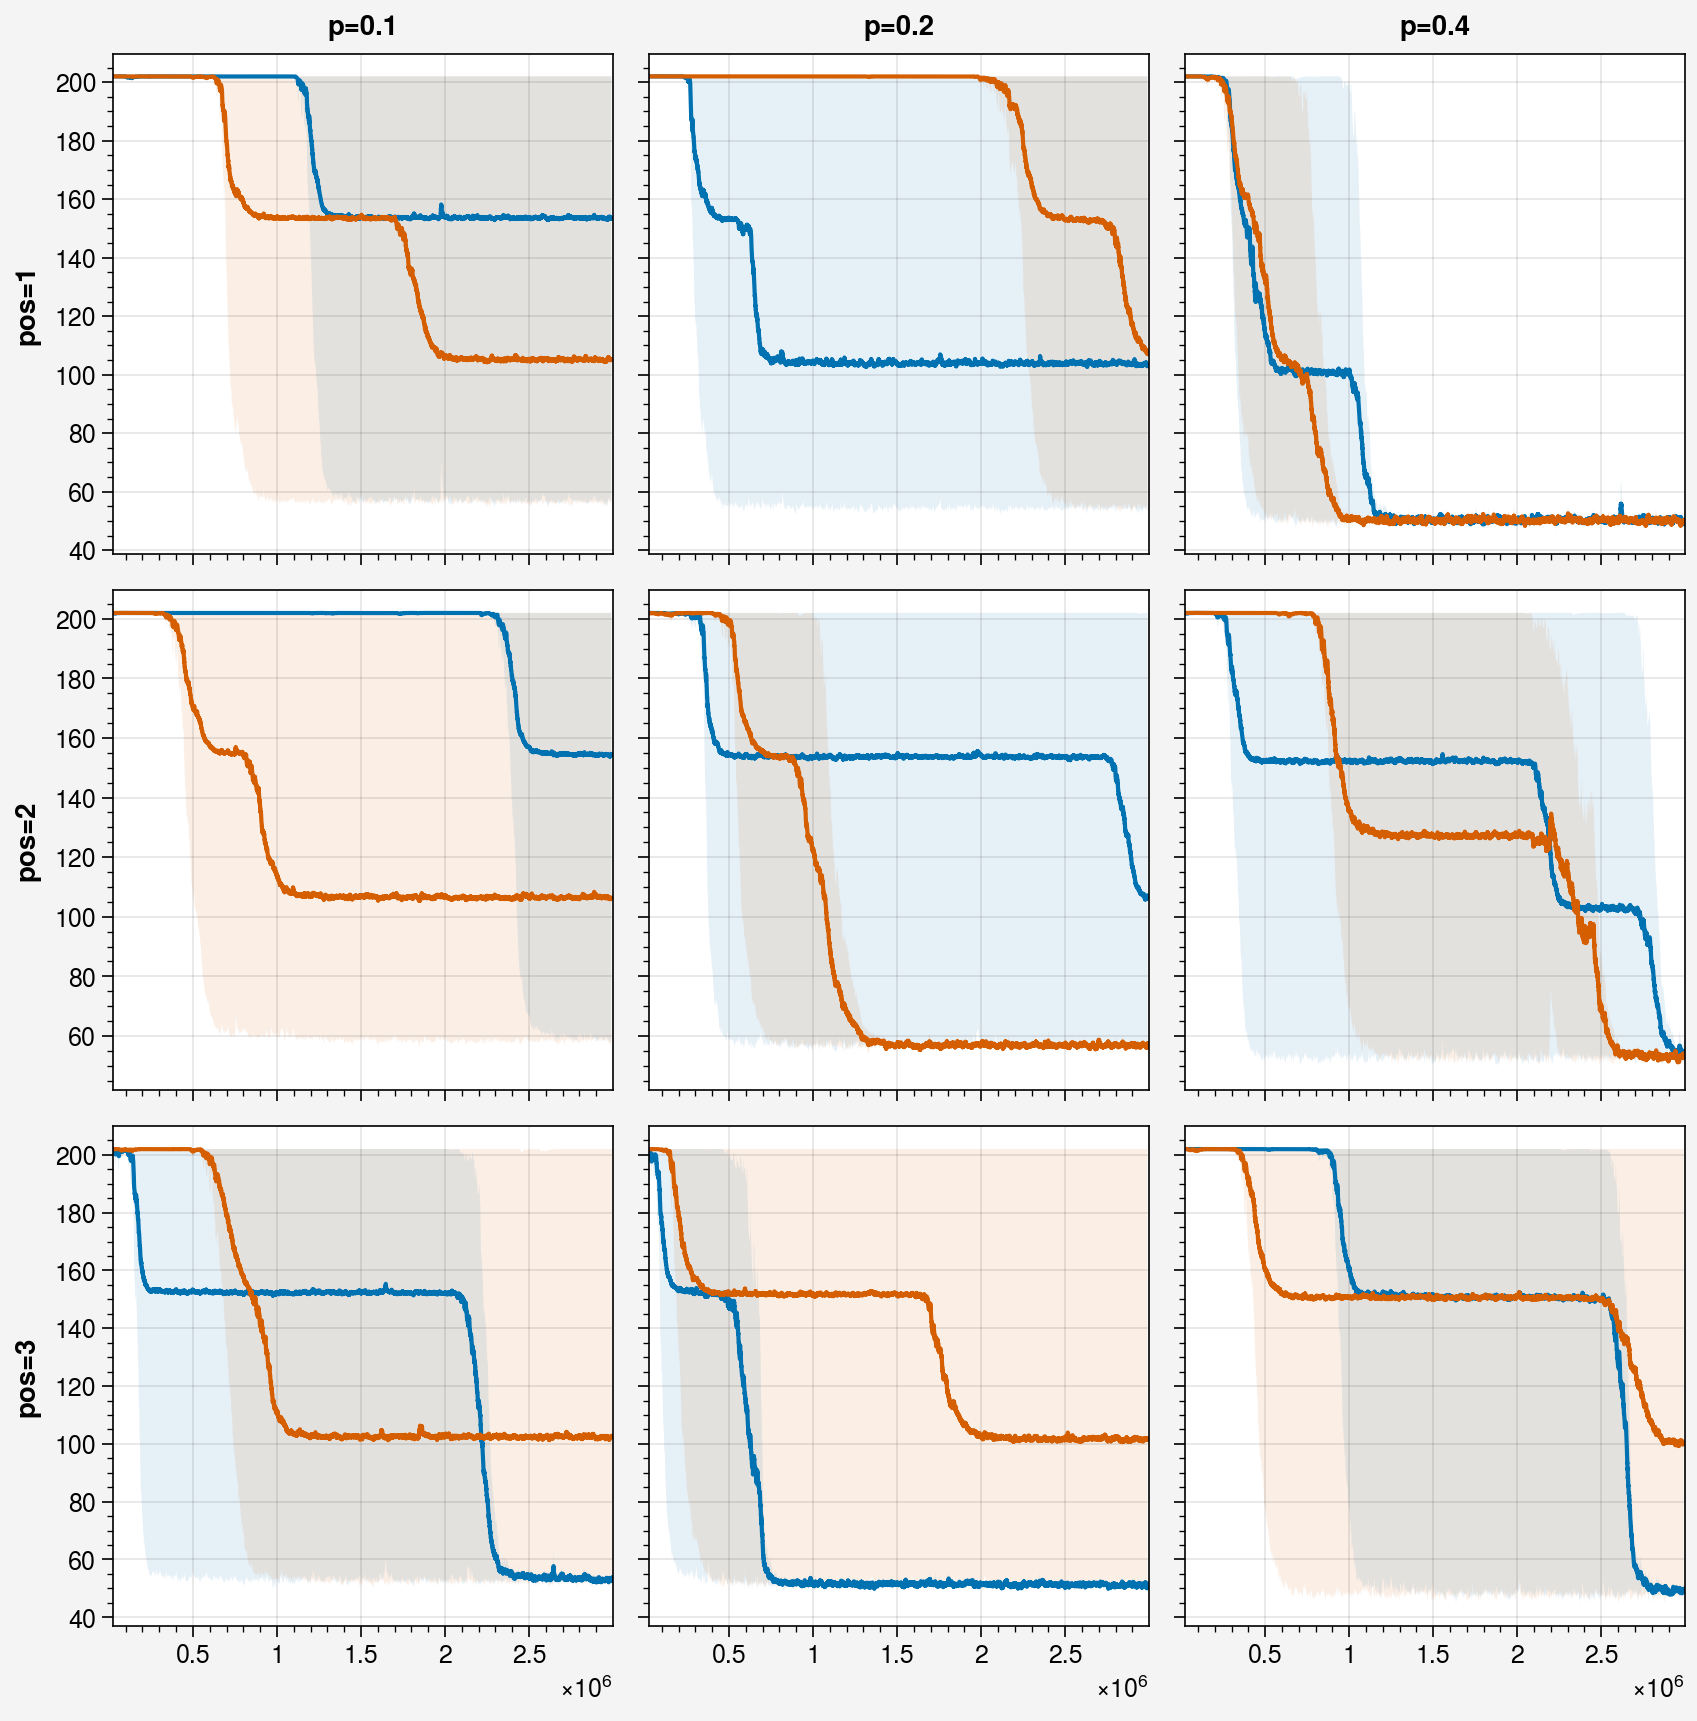

In [4]:
probs = [0.1, 0.2, 0.4]
character_reset_poss = [1, 2, 3]
batch_sizes = [32, 64]

fig, ax = pplt.subplots(ncols=len(probs), nrows=3)
for i, pos in enumerate(character_reset_poss):
    for j, prob in enumerate(probs):
        lines = []
        for batch in batch_sizes:
            # exp_name = f'shortcuts/shortcutnav_shortcutprob{prob}batch{batch}'
            exp_name = f'shortcut_resets/shortcutnav_p{prob}reset{pos}batch{batch}'
            lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))

ax.format(toplabels=[f'p={prob}' for prob in probs],
         leftlabels=[f'pos={pos}' for pos in character_reset_poss])

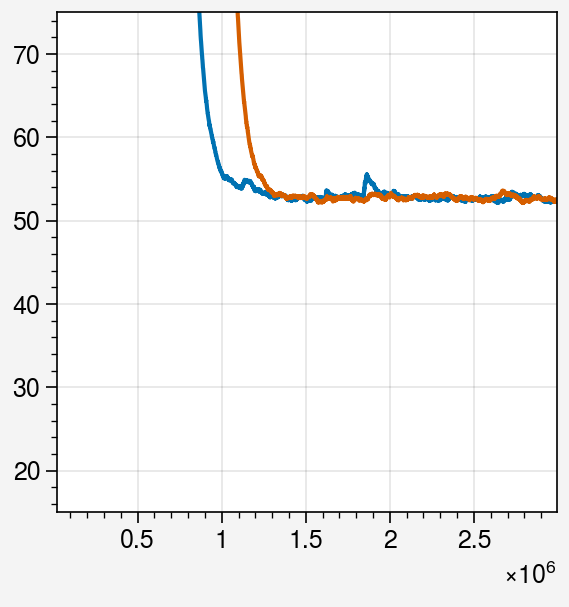

In [11]:
batch = 64
prob = 0.1
pos = 3
exp_name = f'shortcut_resets/shortcutnav_p{prob}reset{pos}batch{batch}'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True,
                                   ewm=0.001)

fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])
ax.format(ylim=[15, 75])

Next
~~* Get some extra poster plots ready on phone~~

~~* Check performance of explore punish variations~~
~~* Change shortcut opening probability~~
~~* Add subfolder saving for runs especially since we're starting to run multiple types of experiments~~
~~* Look at performance of shortcut environment agents - why is there step performance? Maybe need to look at individual experiments~~
* Begin set up of balloon game environment?
~~* Check on differences between PPO return computation and R2D2 and maybe need to allow return computations to simply be as long as the sequences we pull from batch~~
* Later on maybe need to make some test environments and steps to manually compute returns and gradients with to make sure things are working correctly
* Set up functions for collecting activations during policy
* Set up functions to better quantify explorepunish agent performance
    * Later want to have functions that quantify exploration efficiency and memory of goal position
* Observe whether we can see representations of goal position versus self position in RNN
* Test networks with RNN after a first FC layer instead of RNN being first layer
* Better quantify shortcut performance, analyze behavior
    * Looks pretty good - would like way to quantify learning to use shortcut during training too

In [13]:
import pickle

In [21]:
all_shortcut_results = pickle.load(open('data/shortcut/reset_performances', 'rb'))

exp_name = 'shortcutnav_p0.1reset1batch32'

In [24]:
all_shortcut_results[exp_name][0][0].keys()

dict_keys(['shortcuts_used', 'shortcut_use_rate', 'shortcut_actual_steps', 'shortcut_theoretical_steps', 'shortcut_starts', 'path_actual_steps', 'path_theoretical_steps', 'path_starts'])

In [27]:
res.keys()

dict_keys([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 936])

In [31]:
chks

dict_keys([0, 10, 20, 30, 40, 50])

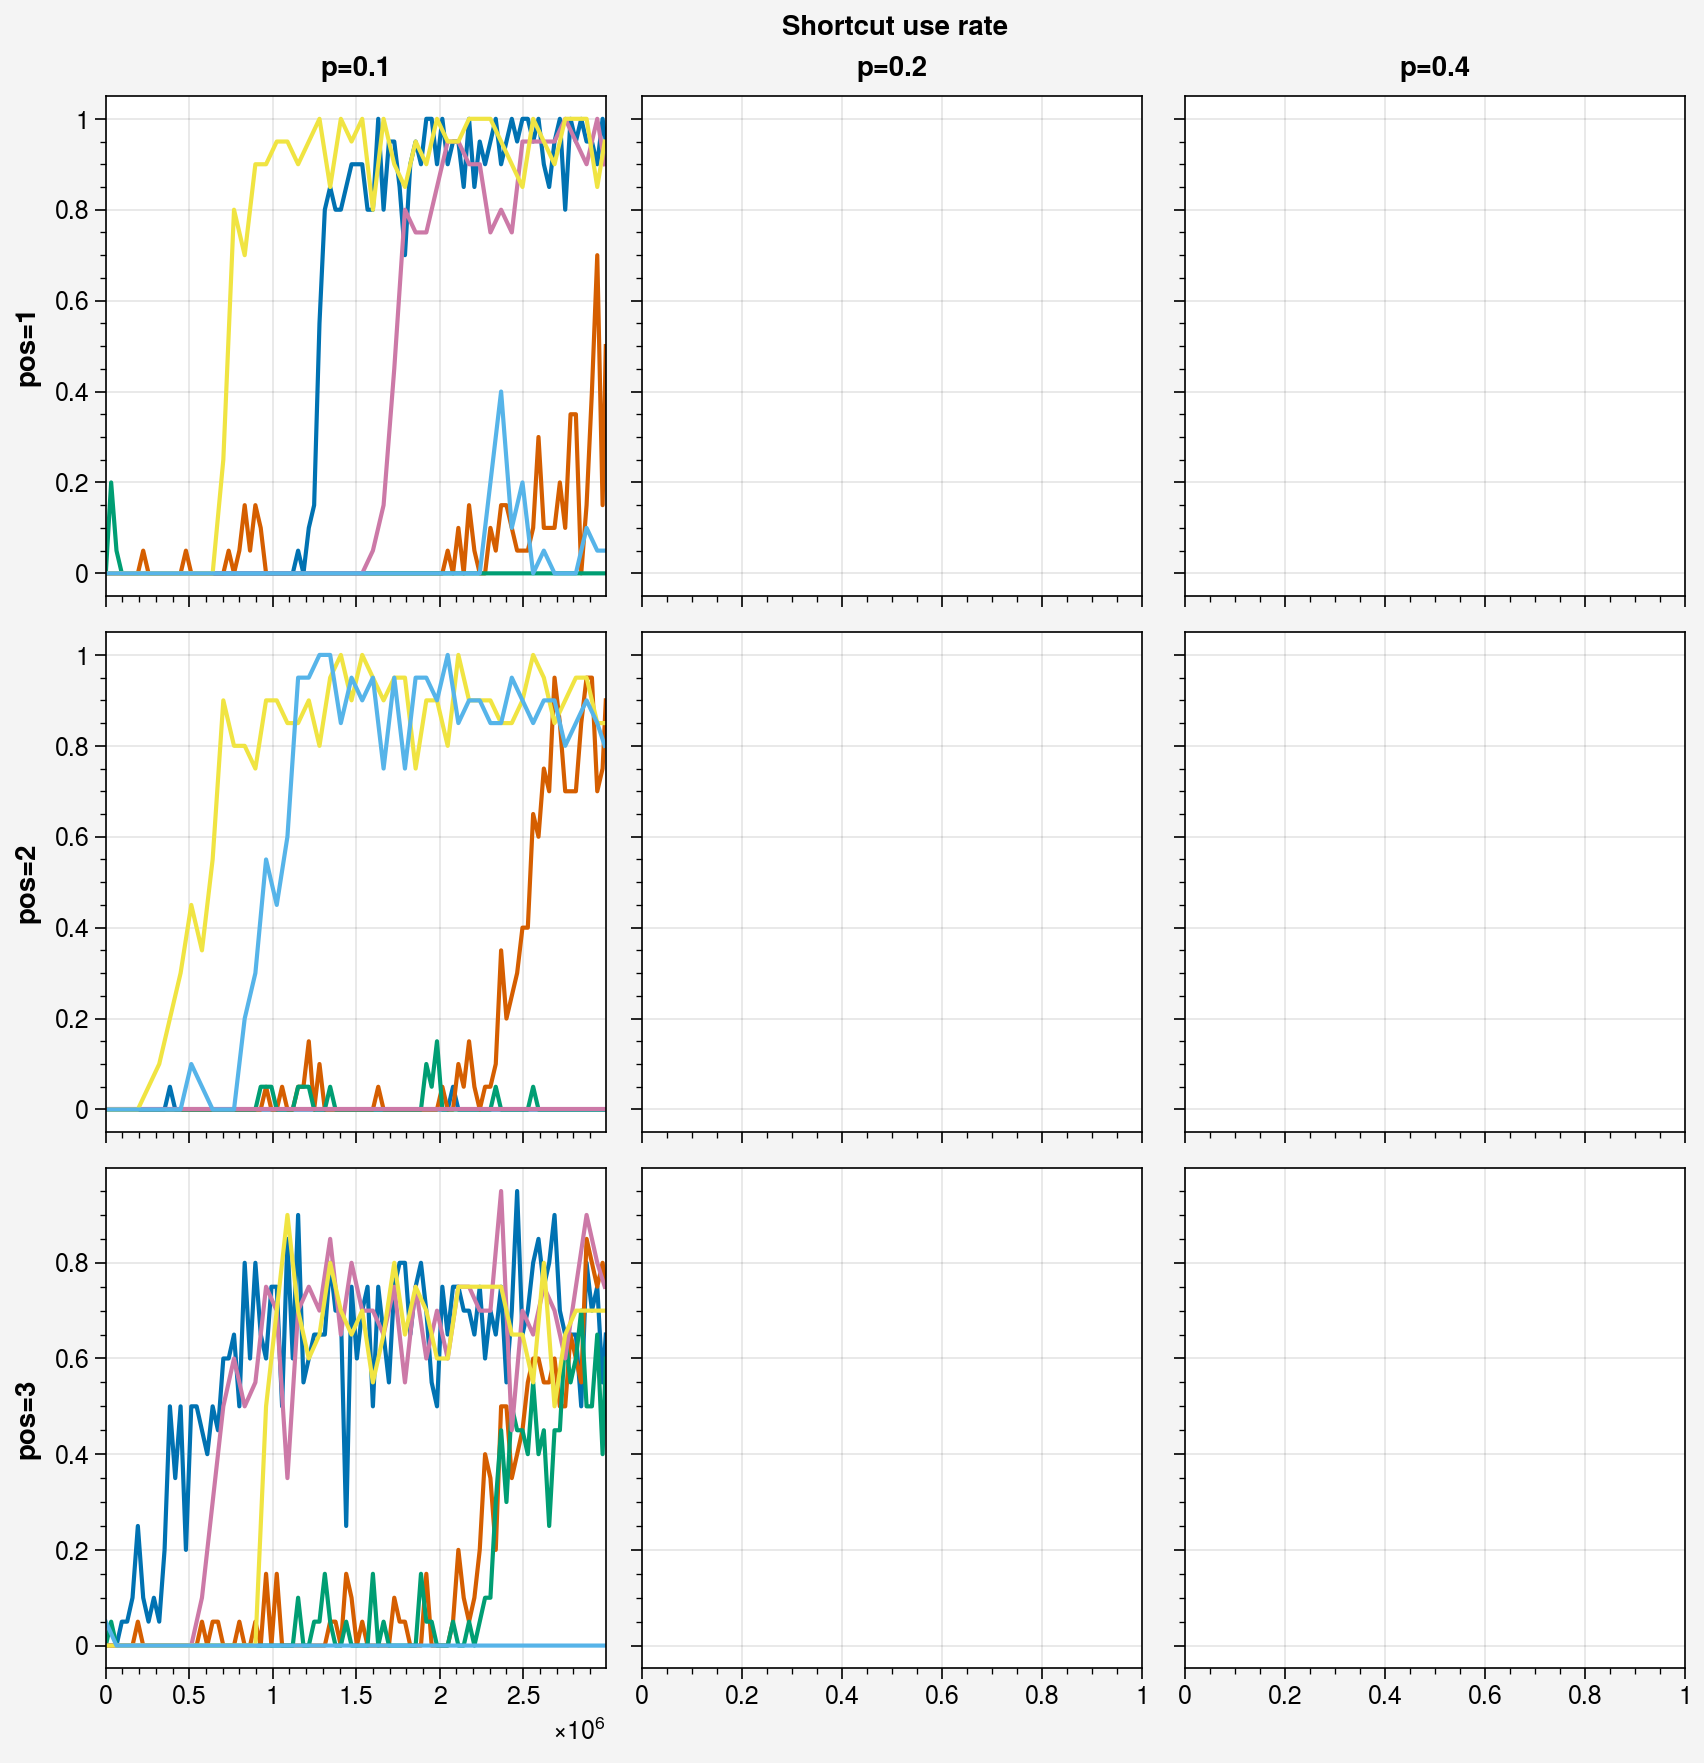

In [37]:
probs = [0.1, 0.2, 0.4]
character_reset_poss = [1, 2, 3]
batch_sizes = [32, 64]
trials = range(3)

all_shortcut_results = pickle.load(open('data/shortcut/reset_performances', 'rb'))

fig, ax = pplt.subplots(ncols=3, nrows=3)
for i, pos in enumerate(character_reset_poss):
    for j, prob in enumerate(probs):
        lines = []
        for batch in batch_sizes:
            exp_name = f'shortcutnav_p{prob}reset{pos}batch{batch}'
            if exp_name not in all_shortcut_results:
                continue
            
            ys = []
            xs = []
            for trial in trials:
                if trial not in all_shortcut_results[exp_name]:
                    continue
                
                chks = all_shortcut_results[exp_name][trial].keys()
                y = []
                x = []
                for chk in chks:
                    res = all_shortcut_results[exp_name][trial][chk]
                    y.append(res['shortcut_use_rate'])
                    x.append(chk*batch*100)
                ys.append(y)
                xs.append(x)
                
                # lines.append(average_runs(exp_name, 'length', ax=ax[i, j], label=f'{batch}'))
            
            for trial in range(len(ys)):
                ax[i, j].plot(xs[trial], ys[trial])

ax.format(toplabels=[f'p={prob}' for prob in probs],
         leftlabels=[f'pos={pos}' for pos in character_reset_poss],
         suptitle='Shortcut use rate')